<a href="https://colab.research.google.com/github/Sharyu-bot/US-Accidents/blob/main/US_Accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US accidents Analysis

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [3]:
data_filename = '/content/us-accidents/US_Accidents_Dec20_Updated.csv'

### Data Preparation and cleaning


In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df


,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.000,Accident on Tanner Rd at Pennbrooke Ln.,439.0,Tanner Rd,R,Greenville,Greenville,SC,29607-6027,US,US/Eastern,KGMU,2019-05-21 08:53:00,76.0,76.0,52.0,28.91,10.0,N,7.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.000,Accident on Houston Branch Rd at Providence Br...,3299.0,Providence Branch Ln,R,Charlotte,Mecklenburg,NC,28270-8560,US,US/Eastern,KEQY,2019-10-07 17:53:00,76.0,76.0,62.0,29.30,10.0,VAR,3.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.400,Stationary traffic on CA-17 from Summit Rd (CA...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2020-12-13 21:53:00,51.0,51.0,80.0,30.17,10.0,W,6.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.000,Accident on US-395 Southbound at Topsy Ln.,NaN,US Highway 395 S,R,Carson City,Douglas,NV,89705,US,US/Pacific,KCXP,2018-04-17 16:55:00,53.6,NaN,16.0,30.16,10.0,SSW,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.000,Accident on I-595 Westbound at Exit 4 / Pine I...,NaN,I-595 W,R,Fort Lauderdale,Broward,FL,33324,US,US/Eastern,KHWO,2016-08-31 17:53:00,84.2,NaN,84.0,29.92,10.0,SSE,13.8,NaN,Overcast,False,False,False,False,True,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2906605,A-2906606,2,2018-06-28 08:49:01,2018-06-28 09:18:51,29.813824,-95.399437,29.813824,-95.399437,0.000,Accident on 30th St at Yale St.,3001.0,Yale St,L,Houston,Harris,TX,77018-8433,US,US/Central,KMCJ,2018-06-28 08:35:00,84.2,NaN,70.0,30.02,9.0,Variable,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,True,False,False,False,Day,Day,Day,Day
2906606,A-2906607,2,2019-01-10 02:01:01,2019-01-10 02:30:32,34.068890,-117.342010,34.068890,-117.342010,0.000,At Valley Blvd - Accident.,NaN,Cypress Ave,R,Colton,San Bernardino,CA,92324,US,US/Pacific,KSBD,2019-01-10 02:00:00,46.9,NaN,74.0,30.14,10.0,Calm,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2906607,A-2906608,2,2020-11-23 12:52:00,2020-11-24 00:47:37,25.702200,-80.335556,25.703040,-80.334099,0.108,Stationary traffic on County Hwy-913 - FL-986 ...,8798.0,SW 72nd St,L,Miami,Miami-Dade,FL,33173-3512,US,US/Eastern,KTMB,2020-11-23 12:53:00,76.0,76.0,85.0,30.00,10.0,NNW,16.0,0.0,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2906608,A-2906609,2,2019-12-29 22:38:00,2019-12-29 23:38:00,40.660140,-111.952460,40.660140,-111.952460,0.000,At UT-266/4700/Exit 15 - Accident.,NaN,I-215 N,R,Salt Lake City,Salt Lake,UT,84129,US,US/Mountain,KU42,2019-12-29 22:54:00,27.0,19.0,81.0,25.81,10.0,SSE,8.0,0.0,Cloudy,False,F

In [7]:
df.columns


Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [10]:
numeric=('int16','int32','int64','float16','float32','float64')
numeric_df = df.select_dtypes(include=numeric)
len(numeric_df.columns)

14

In [11]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                   282821
End_Lng                   282821
Distance(mi)                   0
Description                    0
Number                   1891672
Street                         0
Side                           0
City                         108
County                         0
State                          0
Zipcode                     1114
Country                        0
Timezone                    3430
Airport_Code                6608
Weather_Timestamp          46917
Temperature(F)             67224
Wind_Chill(F)            1183859
Humidity(%)                71270
Pressure(in)               56908
Visibility(mi)             72078
Wind_Direction             63474
Wind_Speed(mph)           307163
Precipitation(in)        1301326
Weather_Condition          71851
Amenity   

In [12]:
# Percentage of missing values

df.isna().sum().sort_values(ascending=False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [13]:
missing_percentage=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

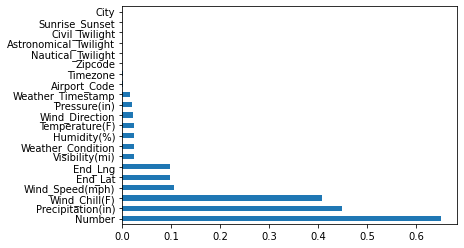

In [14]:
missing_percentage[missing_percentage !=0].plot(kind='barh')

In [15]:
#remove zero from the column
missing_percentage != 0

Number                    True
Precipitation(in)         True
Wind_Chill(F)             True
Wind_Speed(mph)           True
End_Lat                   True
End_Lng                   True
Visibility(mi)            True
Weather_Condition         True
Humidity(%)               True
Temperature(F)            True
Wind_Direction            True
Pressure(in)              True
Weather_Timestamp         True
Airport_Code              True
Timezone                  True
Zipcode                   True
Nautical_Twilight         True
Astronomical_Twilight     True
Civil_Twilight            True
Sunrise_Sunset            True
City                      True
Amenity                  False
Severity                 False
Start_Time               False
End_Time                 False
Start_Lat                False
Start_Lng                False
Distance(mi)             False
Description              False
Turning_Loop             False
Street                   False
Side                     False
County  

### Exploratory anylysis and visualization 
1. city 
2. start time
3. start lat, start longi


In [16]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
df.City.unique()

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [18]:
city=df.City.unique()
len(city[:10])

10

In [19]:
city_by_accident=df.City.value_counts()
city_by_accident[:10]

Los Angeles    68411
Houston        68265
Charlotte      56176
Miami          49965
Dallas         48525
Austin         38808
Raleigh        31355
Atlanta        29244
Sacramento     28984
Orlando        28092
Name: City, dtype: int64

In [20]:
'New York' in df.City

False

#####High no. of accidents in top 20 cities.

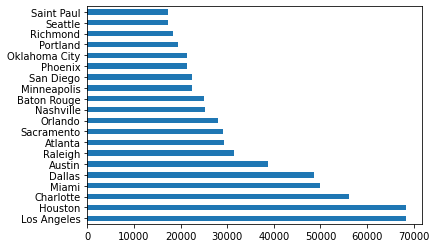

In [21]:
city_by_accident[:20].plot(kind='barh')

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


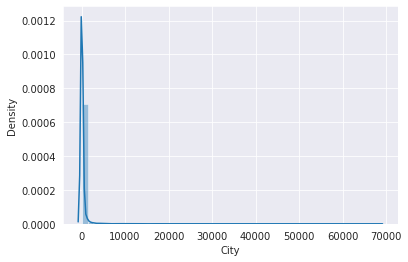

In [23]:
sns.distplot(city_by_accident)

##### Comparing the no. the highest and lowest accidents occured in cities 

In [24]:
high_accidents_city=city_by_accident[city_by_accident>=1000]

In [25]:
low_accidents_city=city_by_accident[city_by_accident < 1000]

In [26]:
len(high_accidents_city)/len(city)

0.04351145038167939

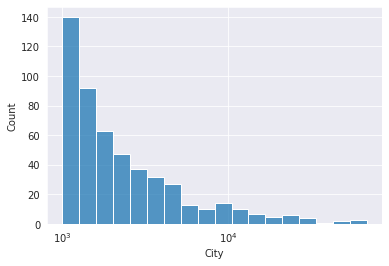

In [27]:
sns.histplot(high_accidents_city , log_scale=True)

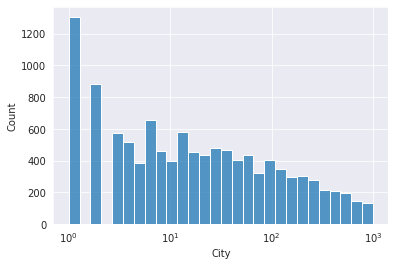

In [28]:
sns.histplot(low_accidents_city , log_scale=True)

In [29]:
city_by_accident[city_by_accident==1]

Grand Cane     1
Crookston      1
Mescalero      1
Rapids City    1
Big Indian     1
              ..
Wapwallopen    1
North Truro    1
Keokuk         1
Obion          1
Gwinner        1
Name: City, Length: 1306, dtype: int64

#### Start time

In [30]:
df.Start_Time[0]

'2019-05-21 08:29:55'

In [31]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [32]:
df.Start_Time.dt.hour

0           8
1          17
2          21
3          16
4          17
           ..
2906605     8
2906606     2
2906607    12
2906608    22
2906609    13
Name: Start_Time, Length: 2906610, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


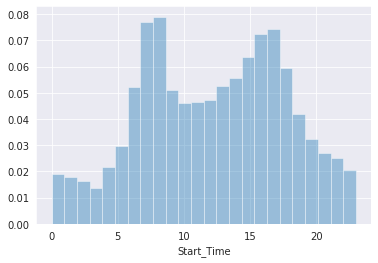

In [33]:
sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

High percentage no of acciends occur between 6am to 10am (probably due to work rush)
Next high percentage of accidents happen between 3pm to 6pm.

In [34]:
df.Start_Time[df.Start_Time.dt.dayofweek==6]

2         2020-12-13 21:53:00
45        2019-12-15 13:47:00
79        2019-06-30 10:21:30
81        2017-05-07 15:44:45
85        2020-10-18 10:26:01
                  ...        
2906556   2018-10-28 18:54:02
2906570   2019-12-15 20:29:30
2906579   2019-09-29 22:46:00
2906582   2020-05-03 14:50:00
2906608   2019-12-29 22:38:00
Name: Start_Time, Length: 191547, dtype: datetime64[ns]

In [35]:
sunday_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
sunday_Start_Time

2         2020-12-13 21:53:00
45        2019-12-15 13:47:00
79        2019-06-30 10:21:30
81        2017-05-07 15:44:45
85        2020-10-18 10:26:01
                  ...        
2906556   2018-10-28 18:54:02
2906570   2019-12-15 20:29:30
2906579   2019-09-29 22:46:00
2906582   2020-05-03 14:50:00
2906608   2019-12-29 22:38:00
Name: Start_Time, Length: 191547, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


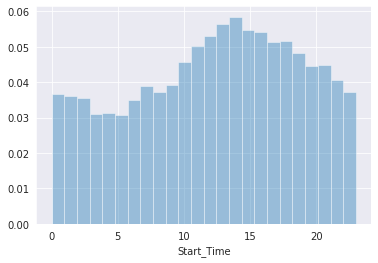

In [36]:
sns.distplot(sunday_Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

In [37]:
months_Start_Time=df.Start_Time[df.Start_Time.dt.month==12]
months_Start_Time

2         2020-12-13 21:53:00
6         2019-12-12 09:48:52
7         2019-12-21 23:59:00
10        2019-12-20 08:20:12
11        2020-12-17 16:38:09
                  ...        
2906591   2020-12-24 08:23:00
2906593   2020-12-10 02:14:00
2906594   2018-12-20 14:55:56
2906603   2016-12-19 06:34:56
2906608   2019-12-29 22:38:00
Name: Start_Time, Length: 403095, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


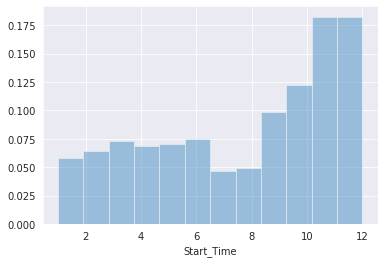

In [38]:
sns.distplot(sunday_Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [39]:
monday_Start_Time=df.Start_Time[df.Start_Time.dt.dayofweek==6]
monday_Start_Time

2         2020-12-13 21:53:00
45        2019-12-15 13:47:00
79        2019-06-30 10:21:30
81        2017-05-07 15:44:45
85        2020-10-18 10:26:01
                  ...        
2906556   2018-10-28 18:54:02
2906570   2019-12-15 20:29:30
2906579   2019-09-29 22:46:00
2906582   2020-05-03 14:50:00
2906608   2019-12-29 22:38:00
Name: Start_Time, Length: 191547, dtype: datetime64[ns]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


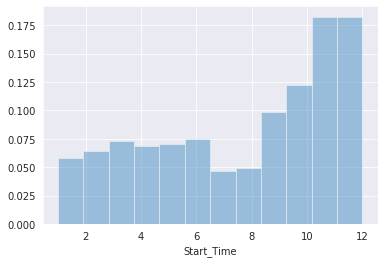

In [40]:
sns.distplot(monday_Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

In [41]:
df_2016= df[df.Start_Time.dt.year==2016]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


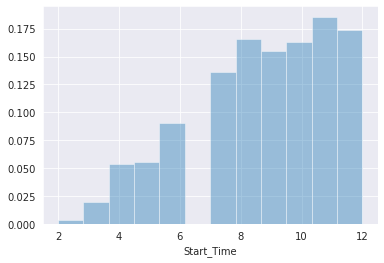

In [42]:
sns.distplot(df_2016.Start_Time.dt.month, bins=12, kde=False, norm_hist=True)

#### Start Latitude and Start Longitude

In [43]:
df.Start_Lng

0          -82.269157
1          -80.745560
2         -121.985052
3         -119.773781
4          -80.265091
              ...    
2906605    -95.399437
2906606   -117.342010
2906607    -80.335556
2906608   -111.952460
2906609   -104.748161
Name: Start_Lng, Length: 2906610, dtype: float64

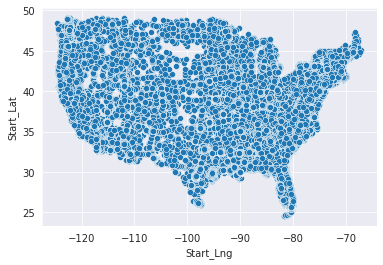

In [44]:
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat)

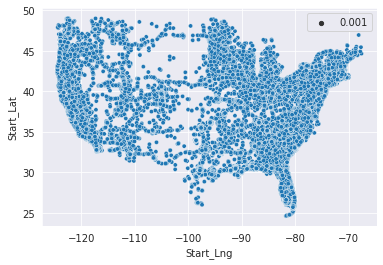

In [45]:
sample_df = df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

In [46]:
import folium

In [47]:
folium.Map(location = [38.9, -77.05],zoom_start=12)

In [48]:
map=folium.Map()

In [49]:
lat,lng = df.Start_Lat[0],df.Start_Lng[0]
lat,lng

(34.808868, -82.26915699999998)

In [50]:
map=folium.Map()
marker=folium.Marker((lat,lng))
marker.add_to(map)
map

In [51]:
for x in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
  print(x)

('Start_Lat', 524691     34.080038
187494     34.104408
1939222    41.079620
2670045    39.018470
999952     37.322769
             ...    
2211625    29.959083
1612393    37.604092
1132840    33.579590
354708     33.798027
2354039    34.068162
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 524691    -118.471951
187494    -118.858429
1939222    -73.921680
2670045    -76.990263
999952    -122.049835
              ...    
2211625    -90.077580
1612393    -77.526703
1132840    -82.041840
354708     -84.487671
2354039   -117.386519
Name: Start_Lng, Length: 100, dtype: float64)


Heat Map


In [52]:
from folium.plugins import HeatMap
map = folium.Map()
heat_data = list(zip(list(df.Start_Lat),list(df.Start_Lng)))

In [ ]:
HeatMap(heat_data).add_to(map)
map

In [54]:
sample_df=df.sample(int(0.001*len(df)))
lat_lon_pairs=list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [55]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

### Ask and Answer Questions 

1. which 5 states has the highest accidents? per capita? Answered
2. is the no. accidents per city decreses / increases expontially? Answered
3. what time of the day are accidents mostly occur? Answered 
4. which days of the week have the most accidents? Answered
5. which months have the most accidents? Answered

###Conclusion 
1. no data for new york
2. more than 1200 cities have reported accidents
3. at the end of the year accidents seems to occur more
6. Data is missing in 2016
7. The accidents occur in most of coastal areas.